Problem Statement: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [111]:
# Importing requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step No. 1 Data Selection

In [112]:
#Loading Datasets

df =pd.read_csv("https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv?raw=True")

In [113]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [114]:
df.head()  #showing first five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
df.tail()  #showing last five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [116]:
df.shape #Dimension of dataset

(614, 13)

There are 614 rows and 13 columns present in dataset.

In [117]:
pd.set_option('display.max_rows',None)

pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5.

In [118]:
df.info()  #information about dataset like data type, Null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [119]:
df.dtypes   #datatype

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Loan_Id,Gender,Married,Dependents,Education,Self_Employeed,Property_Area and Loan Status are Object Dataset, and only one columns are Apllication Income are integer datasets ,aand the remaining datasets like Loan amount,craedit card and etc are float dataset

In [120]:
df.columns  #Checking Columns name

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Missing Features

In [121]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
missing_features

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [122]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean(),4),'% missing values')

Gender 0.0212 % missing values
Married 0.0049 % missing values
Dependents 0.0244 % missing values
Self_Employed 0.0521 % missing values
LoanAmount 0.0358 % missing values
Loan_Amount_Term 0.0228 % missing values
Credit_History 0.0814 % missing values


In [123]:
df.isnull().sum()  #to check null value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In above outcome, Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History has null values.

In [124]:
df.duplicated().sum()

0

No Duplicate data is present in dataset.

<AxesSubplot:>

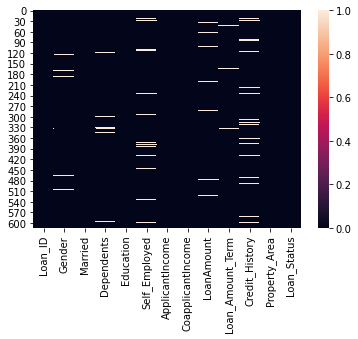

In [125]:
#Let's visualized null values.

sns.heatmap(df.isnull())

Above outcome helps to visualized null values.

In [126]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Number Of Numeric Features=',len(numeric_features))
numeric_features

Number Of Numeric Features= 5


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [127]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Number Of Categorical Features=',len(categorical_features))
categorical_features

Number Of Categorical Features= 8


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt   # Importing Libraries

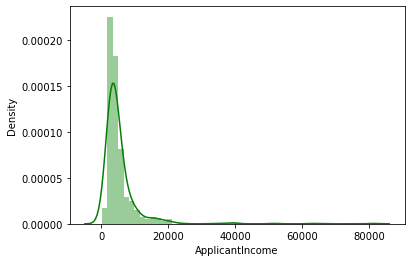

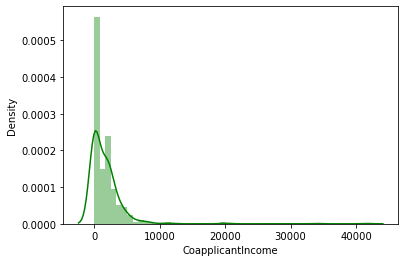

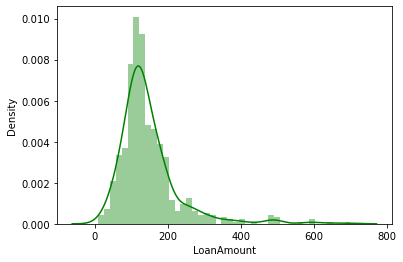

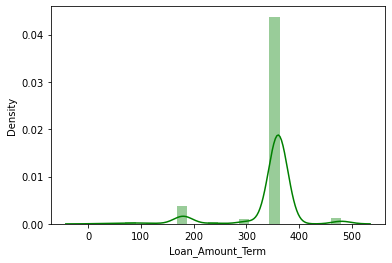

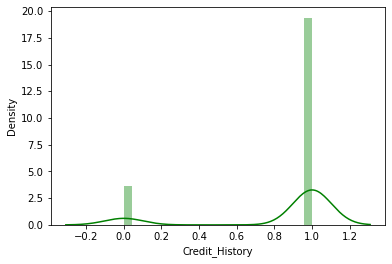

In [129]:
for i in numeric_features:
    plt.figure()
    sns.distplot(df[i],color='green')

In [130]:
df['Loan_Status'].value_counts() ##gives count

Y    422
N    192
Name: Loan_Status, dtype: int64

In above outcome, There are total 422 - 1's(Y) and 192 - 0's (N).

In [131]:
data = df['Loan_Status'].value_counts()  #storing values in data

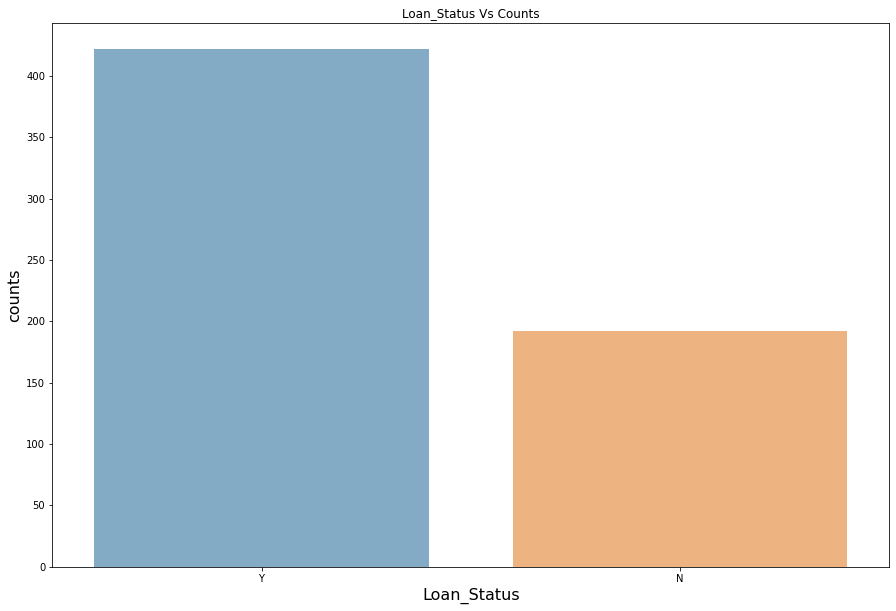

In [132]:
#Let's visualized it thorugh bargraph.

plt.figure(figsize=(15,10))
sns.barplot(data.index,data.values,alpha=0.6)
plt.xlabel('Loan_Status', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('Loan_Status Vs Counts')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

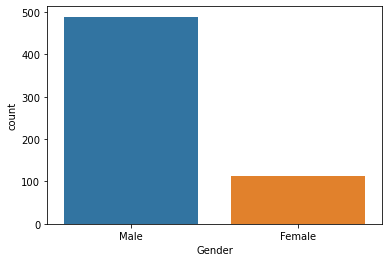

In [133]:
sns.countplot(df['Gender'],data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

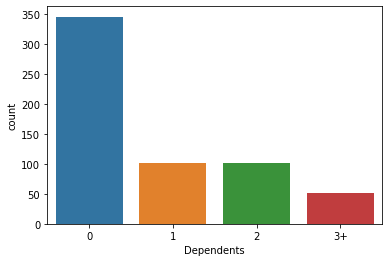

In [134]:
sns.countplot(df['Dependents'],data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

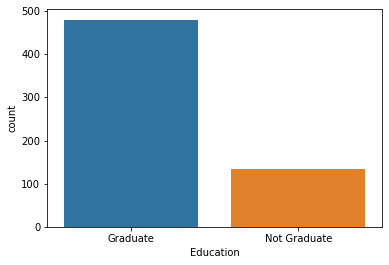

In [135]:
sns.countplot(df['Education'],data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

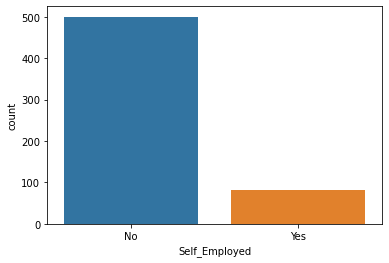

In [136]:
sns.countplot(df['Self_Employed'],data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

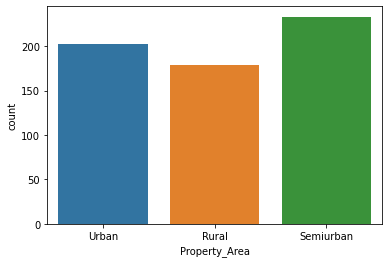

In [137]:
sns.countplot(df['Property_Area'],data=df)

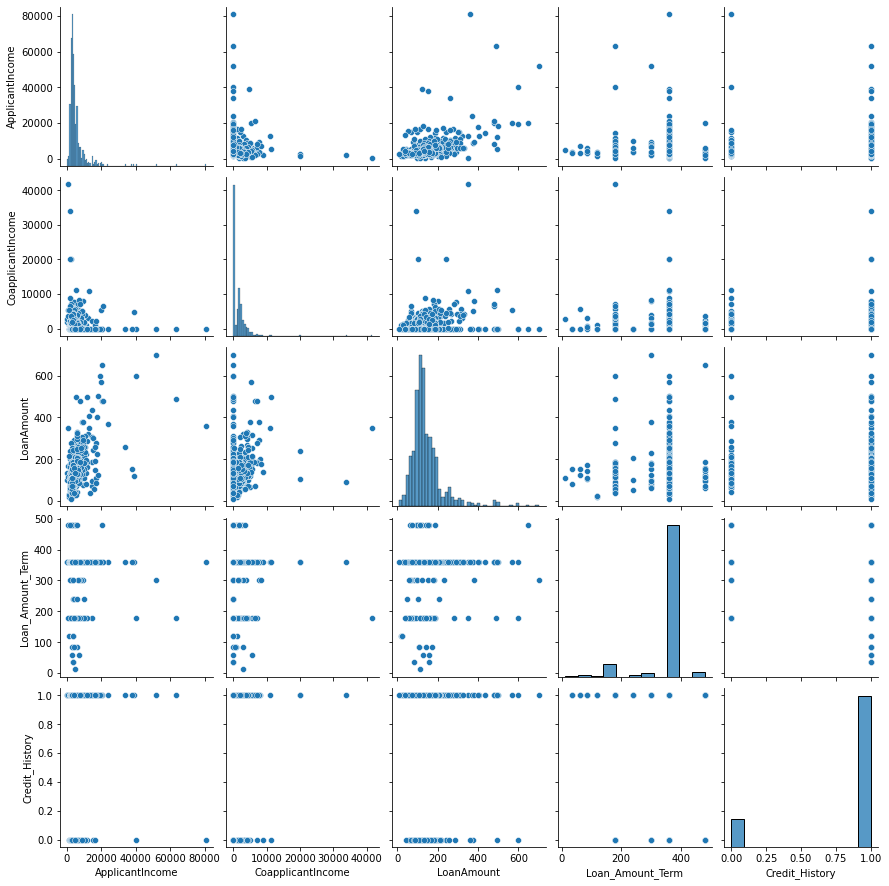

In [138]:
sns.pairplot(df)
plt.show()

Step 3. Data Transformation

In [139]:
from sklearn.impute import SimpleImputer  #import required libraries

In [140]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [141]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [142]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [143]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [144]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)

In [145]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [146]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [147]:
df = df.drop(columns=['Loan_ID']) #removing unnecessary columns

In [148]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [149]:
df.isnull().sum()   # Checking Null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no null values present in dataset

<AxesSubplot:>

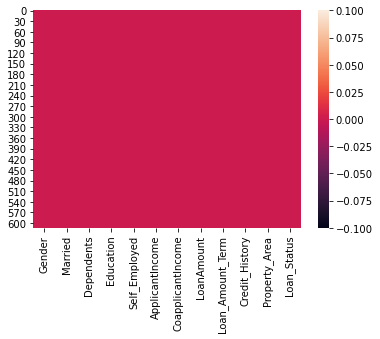

In [150]:
sns.heatmap(df.isnull())  #Helps to visulized it better for null values.

In [151]:
from sklearn.preprocessing import LabelEncoder #importing required library.

In [152]:
list=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [153]:
lb=LabelEncoder()

In [154]:
for i in list:
    df[i]=lb.fit_transform(df[i])

In [155]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [156]:
df.describe()  #statstical summary

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Describe method gives stastical details like count, mean, std, min, max, 25%, 50%, 75%. Above outcome shows, There are outiler present in dataset by comparing mean and 50% value. There is major difference between them like in Married, Dependents, ApplicantIncome, CoapplicantIncome, LoanAmount etc.

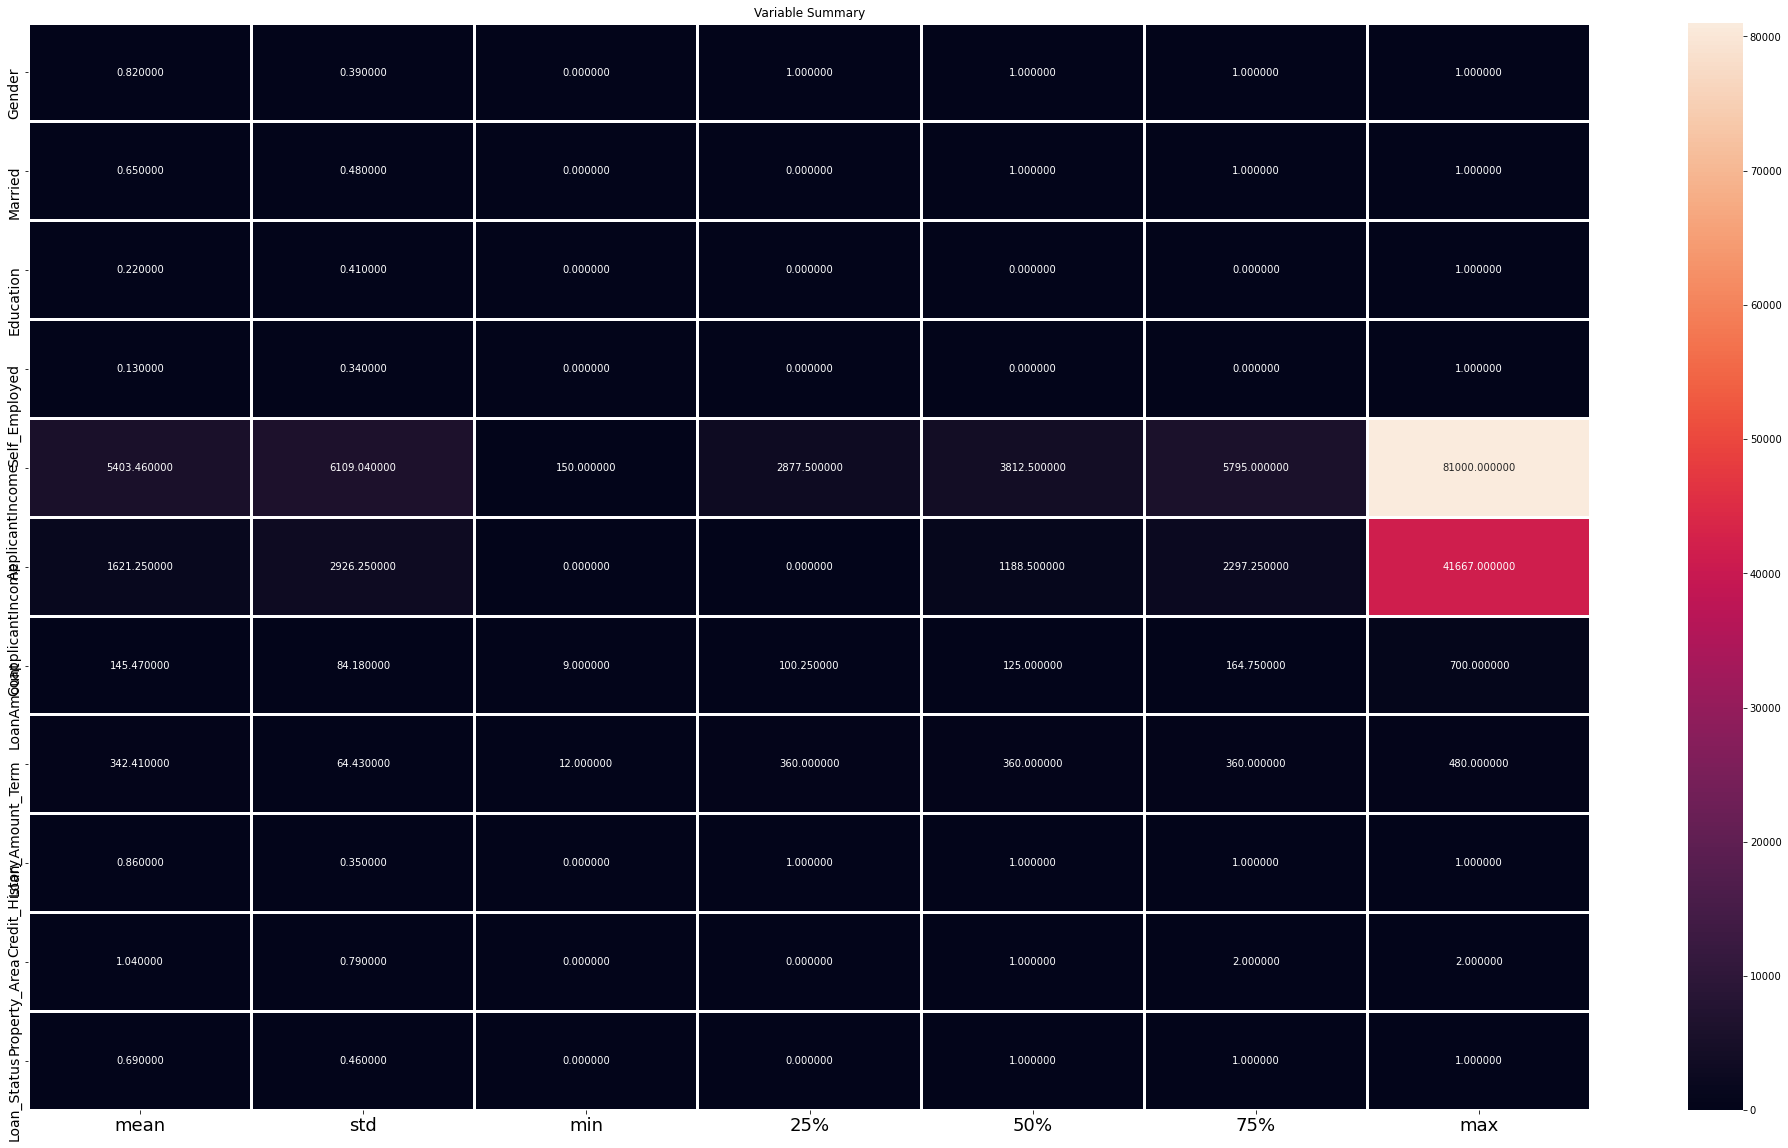

In [157]:
#lets visulized dataset

plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

Above outcome helps to understand relation between various varibales better.

In [158]:
corr=df.corr()   # Checking for correlation

In [159]:
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112


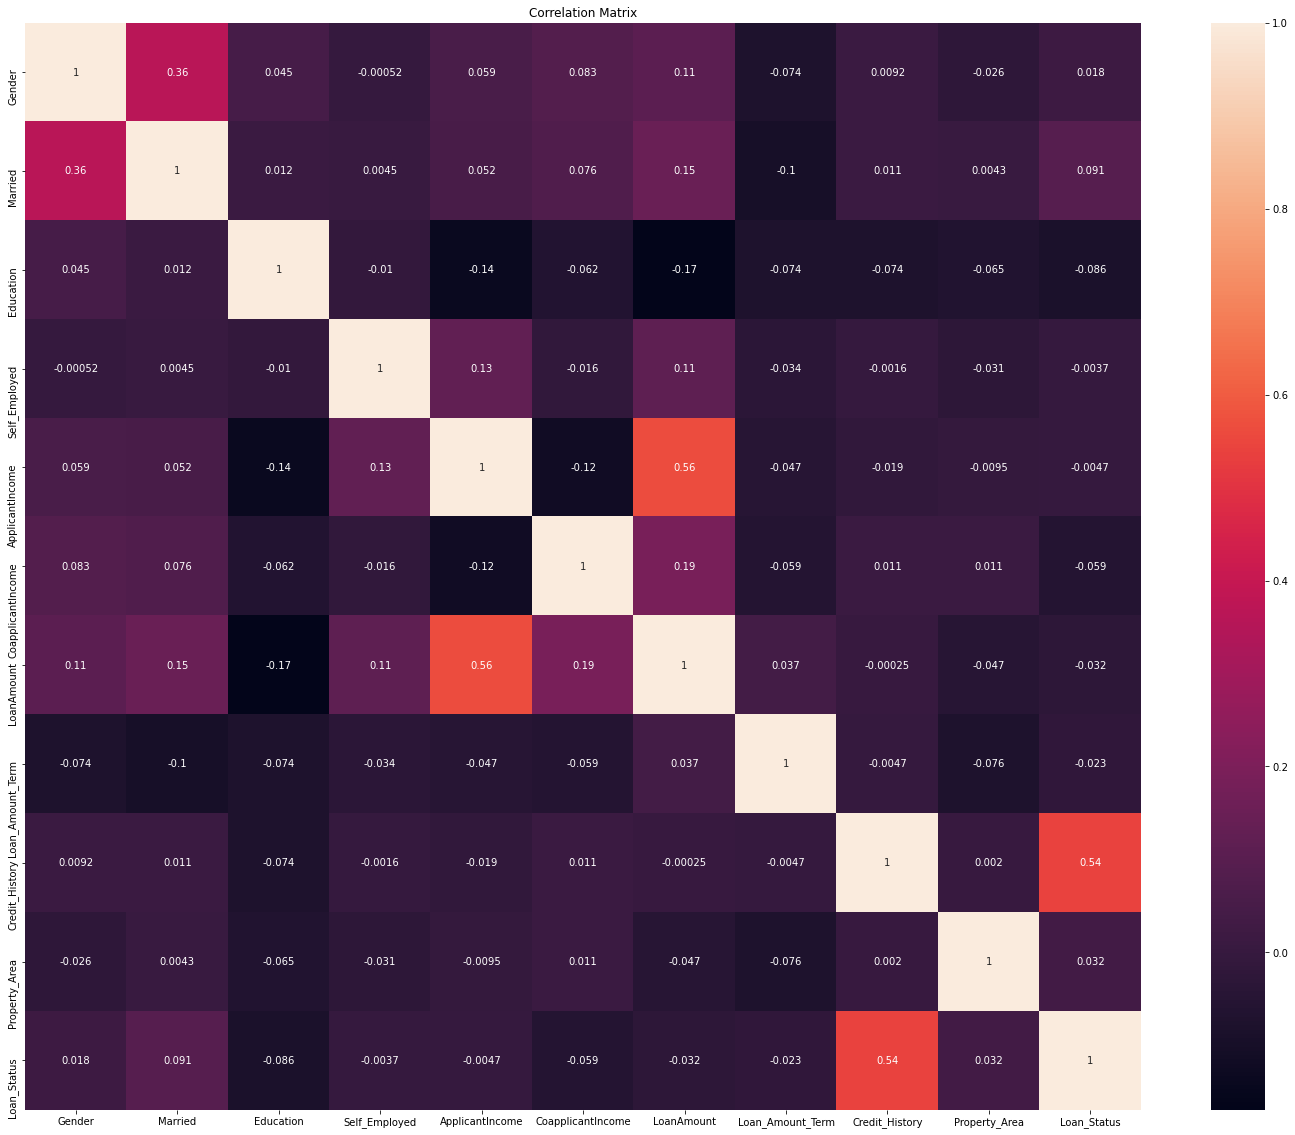

In [160]:
# visulization of correlated values.

plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()


All columns of database are positively correlated. Gender has 1.8%, Married has 9.1%, Dependents has 1%, Education has -8.6%, Self_Employed has -0.37%, ApplicatIncome has-0.47%, Coapplicant has -5.9%, LoanAmount has -4.1%, Loan_Amount_Term has -0.57%, Credit_History has 54%, Property_Area has 3.2% coorelation with target value. Max Correlation: Credit_History Min Correlation: Education

# Step 5. Data Cleaning & Removing Outliers

Gender                  AxesSubplot(0.125,0.799681;0.110714x0.0803191)
Married              AxesSubplot(0.257857,0.799681;0.110714x0.0803191)
Education            AxesSubplot(0.390714,0.799681;0.110714x0.0803191)
Self_Employed        AxesSubplot(0.523571,0.799681;0.110714x0.0803191)
ApplicantIncome      AxesSubplot(0.656429,0.799681;0.110714x0.0803191)
CoapplicantIncome    AxesSubplot(0.789286,0.799681;0.110714x0.0803191)
LoanAmount              AxesSubplot(0.125,0.703298;0.110714x0.0803191)
Loan_Amount_Term     AxesSubplot(0.257857,0.703298;0.110714x0.0803191)
Credit_History       AxesSubplot(0.390714,0.703298;0.110714x0.0803191)
Property_Area        AxesSubplot(0.523571,0.703298;0.110714x0.0803191)
Loan_Status          AxesSubplot(0.656429,0.703298;0.110714x0.0803191)
dtype: object

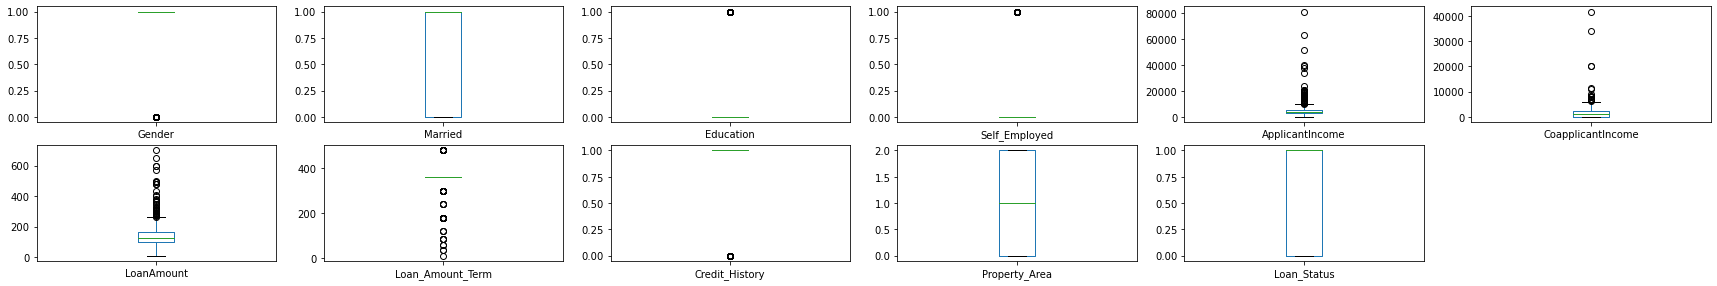

In [161]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(30,20))

In [162]:
df.skew() #to check skewness

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [163]:
df.head() #showing first five rows.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [167]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [168]:
dfNumCols = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [169]:
#applying zscore on only the dataset which has numeric columns

z=np.abs(zscore(dfNumCols))

df_new =df[(z<3).all(axis=1)]

In [170]:
df_new.shape

(577, 12)

#After applying zscore method,We got new dataset with 577 rows and 12 columns

In [171]:
loss_of_data=(614-577)/614*100
loss_of_data

6.026058631921824

In [172]:
df=df_new

In [173]:
df.skew()  #to check skewness

Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [174]:
dfNumCols = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [175]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_new= df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [176]:
df_new.shape

(214, 12)

Step 5. Creation of train and test data sets using optimum parameters

In [179]:
#splitting dataset into x and y only numeric daat
dfNumCols = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']]
y = df['Loan_Status']
x = dfNumCols.drop(columns=['Loan_Status'])

In [180]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [181]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
std=StandardScaler()

In [187]:
X=std.fit_transform(x)

In [188]:
X

array([[ 0.39926641, -0.86103617, -0.26770712,  0.23085296,  0.41851254],
       [-0.02802029,  0.05284031, -0.12532481,  0.23085296,  0.41851254],
       [-0.56229742, -0.86103617, -1.22878771,  0.23085296,  0.41851254],
       ...,
       [ 1.14954946, -0.71559164,  2.09939878,  0.23085296,  0.41851254],
       [ 0.98450744, -0.86103617,  0.92474472,  0.23085296,  0.41851254],
       [-0.02802029, -0.86103617, -0.03633587,  0.23085296, -2.38941464]])

In [190]:
x=X

In [191]:
x.shape

(577, 5)

In [192]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=340)
y_train

385    1
421    0
405    1
490    1
493    1
474    1
86     1
311    1
192    0
338    0
128    0
78     0
446    1
75     0
13     0
293    0
104    1
156    1
55     1
566    1
110    1
65     0
182    1
380    1
312    1
34     0
188    1
515    1
472    1
217    1
539    1
398    1
349    1
218    0
234    1
248    1
565    1
258    0
584    0
77     0
158    1
563    1
528    1
357    0
53     0
607    1
553    0
112    0
453    1
377    1
244    1
483    1
154    1
173    1
125    1
300    0
463    1
276    1
143    1
586    1
79     1
521    1
372    1
132    1
170    1
238    1
488    1
410    0
444    1
478    1
180    0
178    1
303    1
45     1
518    0
56     1
572    1
404    0
352    1
587    1
588    1
26     1
179    0
225    0
471    0
336    1
390    1
325    0
159    1
54     0
330    1
431    0
393    1
140    0
309    1
395    1
346    0
127    1
166    0
425    1
601    1
611    1
559    1
428    1
202    0
375    1
576    0
593    1
66     0
386    1
597    0
2

In [193]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [194]:
lg=LogisticRegression()

In [200]:
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=340)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

In [201]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=340)

In [211]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [212]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB()
rfc=RandomForestClassifier()

In [213]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [214]:
fun(svc)

Accuracy Score 0.8
Confusion Matrix
 [[19 26]
 [ 3 97]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.42      0.57        45
           1       0.79      0.97      0.87       100

    accuracy                           0.80       145
   macro avg       0.83      0.70      0.72       145
weighted avg       0.81      0.80      0.78       145

F1 score 0.8000000000000002


In [215]:
fun(lg)

Accuracy Score 0.8068965517241379
Confusion Matrix
 [[19 26]
 [ 2 98]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.42      0.58        45
           1       0.79      0.98      0.87       100

    accuracy                           0.81       145
   macro avg       0.85      0.70      0.73       145
weighted avg       0.83      0.81      0.78       145

F1 score 0.8068965517241379


In [216]:
fun(dtc)

Accuracy Score 0.7655172413793103
Confusion Matrix
 [[24 21]
 [13 87]]
Classification Report
               precision    recall  f1-score   support

           0       0.65      0.53      0.59        45
           1       0.81      0.87      0.84       100

    accuracy                           0.77       145
   macro avg       0.73      0.70      0.71       145
weighted avg       0.76      0.77      0.76       145

F1 score 0.7655172413793103


In [217]:
fun(knn)

Accuracy Score 0.7724137931034483
Confusion Matrix
 [[19 26]
 [ 7 93]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.42      0.54        45
           1       0.78      0.93      0.85       100

    accuracy                           0.77       145
   macro avg       0.76      0.68      0.69       145
weighted avg       0.77      0.77      0.75       145

F1 score 0.7724137931034483


In [218]:
fun(rfc)

Accuracy Score 0.7862068965517242
Confusion Matrix
 [[21 24]
 [ 7 93]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.47      0.58        45
           1       0.79      0.93      0.86       100

    accuracy                           0.79       145
   macro avg       0.77      0.70      0.72       145
weighted avg       0.78      0.79      0.77       145

F1 score 0.7862068965517242


In [220]:
from sklearn.model_selection import cross_val_score  #Importing requried lob.

In [222]:
scr = cross_val_score(lg,x,y,cv=3)
print('Cross validation score for Logistic Regression :',scr.mean())

Cross validation score for Logistic Regression : 0.8180411629245826


In [224]:
scr = cross_val_score(dtc,x,y,cv=3)
print('Cross validation score for Decision Tree Classifer:',scr.mean())

Cross validation score for Decision Tree Classifer: 0.7400061168681634


In [226]:
scr = cross_val_score(knn,x,y,cv=3)
print('Cross validation score for KNN :',scr.mean())

Cross validation score for KNN : 0.7850820379965459


In [228]:
scr = cross_val_score(rfc,x,y,cv=3)
print('Cross validation score for Random Forest Classifer :',scr.mean())

Cross validation score for Random Forest Classifer : 0.7954807138744963


In [229]:
scr = cross_val_score(svc,x,y,cv=3)
print('Cross validation score for Support Vector Machine :',scr.mean())

Cross validation score for Support Vector Machine : 0.8145689407023604


# Step No 7. Hyper parameter tuning

In [230]:
from sklearn.model_selection import GridSearchCV    #Importing requried lib.

In [231]:
parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [232]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=2)

In [233]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [234]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [235]:
mod = RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=4, n_estimators=200)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.6896551724138


In [236]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [237]:
# Lets find ROC AUC Score

roc_auc_score(y_test,lg.predict(x_test))   #LogisticRegression

0.7011111111111111

In [238]:
roc_auc_score(y_test,rfc.predict(x_test))   #RandonForest

0.6983333333333334

In [239]:
roc_auc_score(y_test,dtc.predict(x_test))   #DecisionTree

0.7016666666666667

In [240]:
roc_auc_score(y_test,knn.predict(x_test))   #KNeighbors

0.6761111111111112

In [241]:
roc_auc_score(y_test,svc.predict(x_test))   #SupportVectorMachine

0.6961111111111111

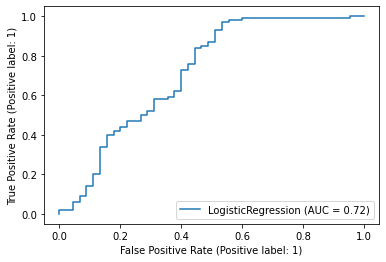

In [242]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(lg,x_test,y_test)

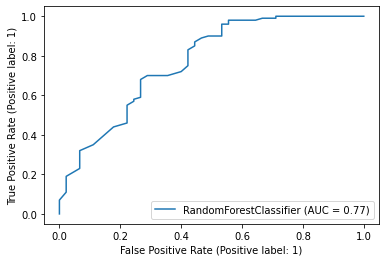

In [243]:
plot_roc_curve(rfc,x_test,y_test)

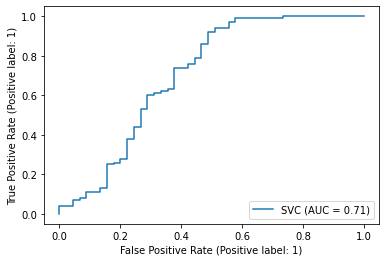

In [244]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(svc,x_test,y_test)

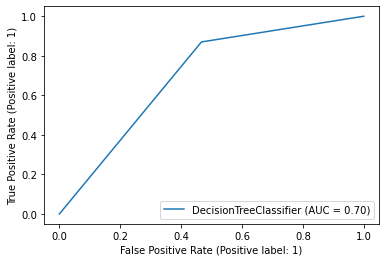

In [245]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(dtc,x_test,y_test)

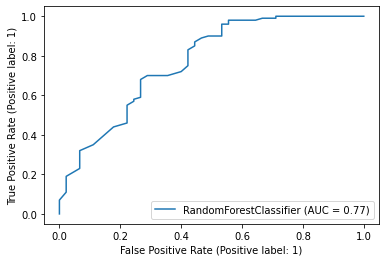

In [246]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(rfc,x_test,y_test)

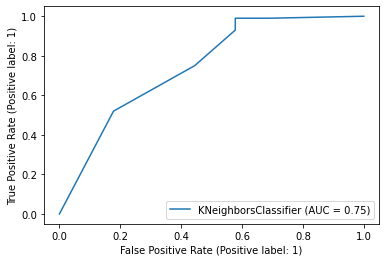

In [247]:
#Lets check ROC AUC Curve for the model

plot_roc_curve(knn,x_test,y_test)

# Saving Model

In [250]:
import pickle
filename='Loan Application Status Prediction Project.pkl'
pickle.dump(rfc,open(filename,'wb'))

     Actual  Predict
249       1        1
60        1        1
516       1        1
450       0        0
189       1        1
562       1        1
93        1        1
537       1        1
323       1        1
194       1        1
370       1        1
489       0        1
241       0        1
407       1        1
548       0        0
447       0        1
568       0        0
400       0        0
360       0        1
505       1        1
475       1        1
193       1        0
316       1        1
613       0        0
210       0        1
162       0        0
3         1        1
15        1        1
76        0        1
237       1        1
74        1        1
459       0        1
72        1        1
184       1        1
361       1        1
406       1        1
122       1        0
137       1        1
501       1        1
596       0        1
33        1        1
327       1        1
373       0        0
420       1        1
514       0        1
161       0        1
289       1  

Text(0.5, 1.0, 'Random Forest Classifier Line')

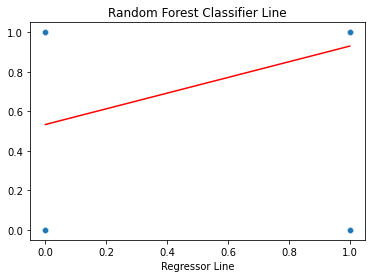

In [255]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)
print(res)
x=np.array(y_test)
y=np.array(rfc.predict(x_test))

sns.scatterplot(x,y)

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b,color='red')
plt.xlabel('Regressor Line')
plt.title('Random Forest Classifier Line')